# Visualize
---

## 1. Import Required Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings('ignore')


---
## 2. Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## 3. Load Data and Model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/processed/Processed.csv")
X = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/X.csv")
y = pd.read_csv("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/y.csv").values.ravel()

model = joblib.load("/content/drive/MyDrive/INX_Employee_Performance_Analysis/Data/external/random_forest_model.pkl")


---
## 4.Feature Importance Plot

In [17]:
importances = model.feature_importances_

feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


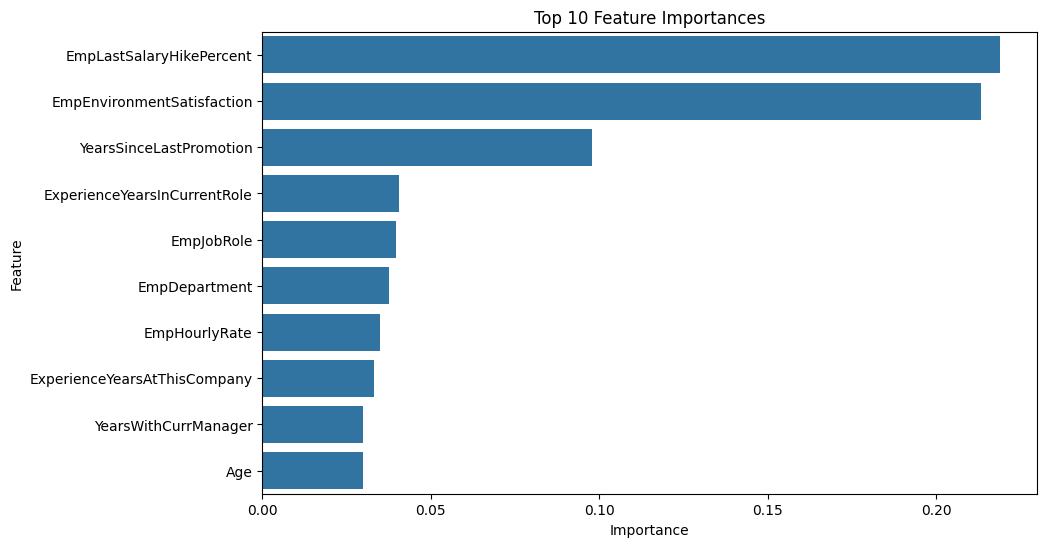

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_imp_df.head(10)
)
plt.title("Top 10 Feature Importances")
plt.show()


---
## 5. Target Variable Distribution

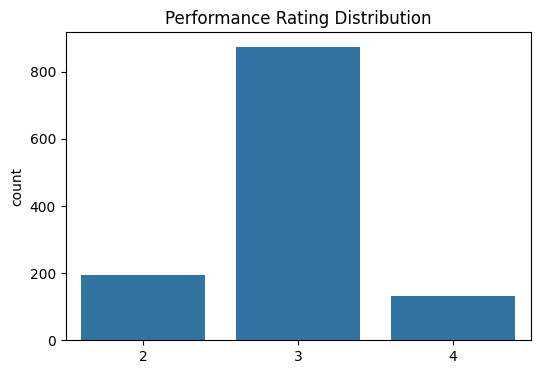

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=y.squeeze())
plt.title("Performance Rating Distribution")
plt.show()


---
## 6. Department-wise Performance

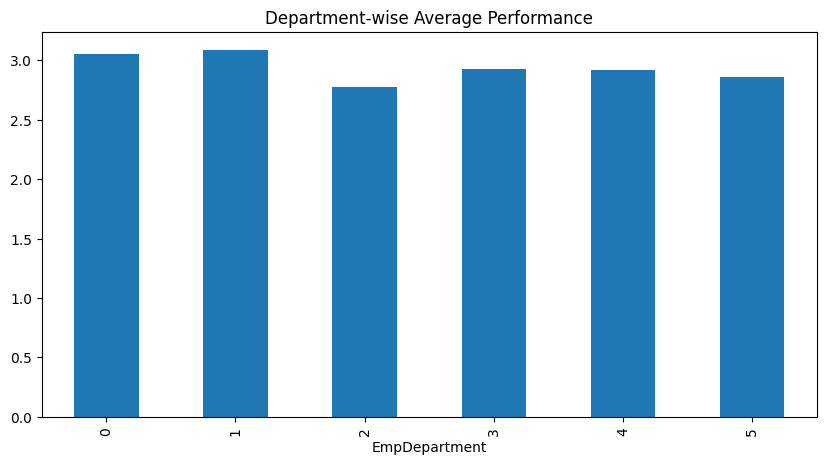

In [16]:
df = X.copy()
df['PerformanceRating'] = y

dept_perf = df.groupby('EmpDepartment')['PerformanceRating'].mean()

dept_perf.plot(kind='bar', figsize=(10,5))
plt.title("Department-wise Average Performance")
plt.show()


---
## 7. Performance Rating vs Work-Life Balance
__Insight:__

Higher-performing employees generally report better work–life balance, indicating HR policy impact on productivity.

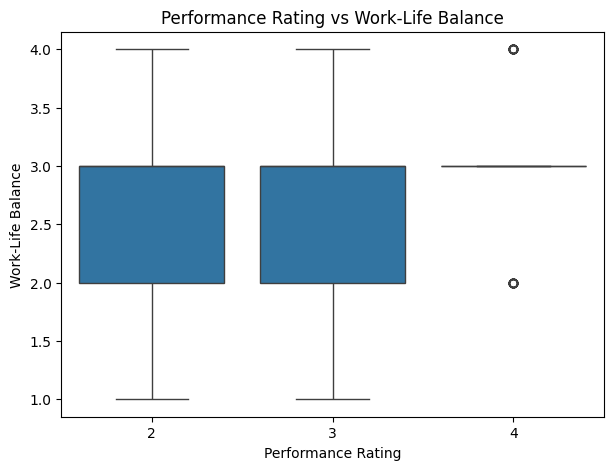

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='EmpWorkLifeBalance', data=df)
plt.title("Performance Rating vs Work-Life Balance")
plt.xlabel("Performance Rating")
plt.ylabel("Work-Life Balance")
plt.show()


---
## 8. Performance Rating vs Environment Satisfaction
__Insight:__

Low environment satisfaction is a strong indicator of poor performance, supporting feature importance results.

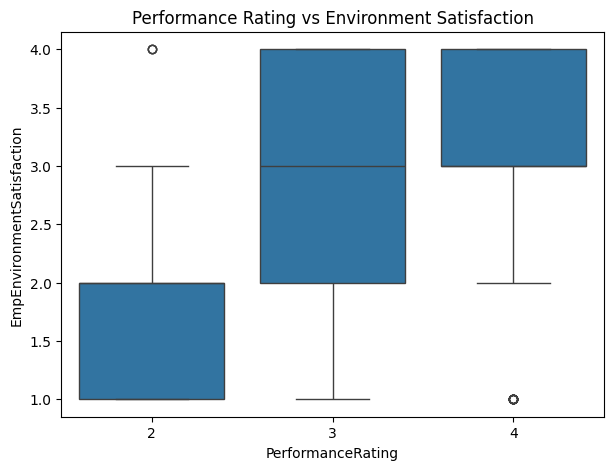

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='EmpEnvironmentSatisfaction', data=df)
plt.title("Performance Rating vs Environment Satisfaction")
plt.show()


---
## 9. Salary Hike Impact on Performance
__Insight:__

Employees with higher salary hikes are more likely to fall under top performance ratings.

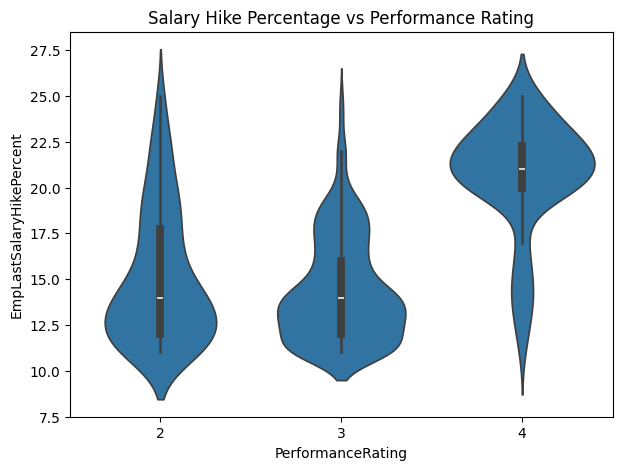

In [ ]:
plt.figure(figsize=(7,5))
sns.violinplot(x='PerformanceRating', y='EmpLastSalaryHikePercent', data=df)
plt.title("Salary Hike Percentage vs Performance Rating")
plt.show()


---
## 10. Years Since Last Promotion vs Performance
__Insight:__

Employees waiting longer for promotions show declining performance levels.

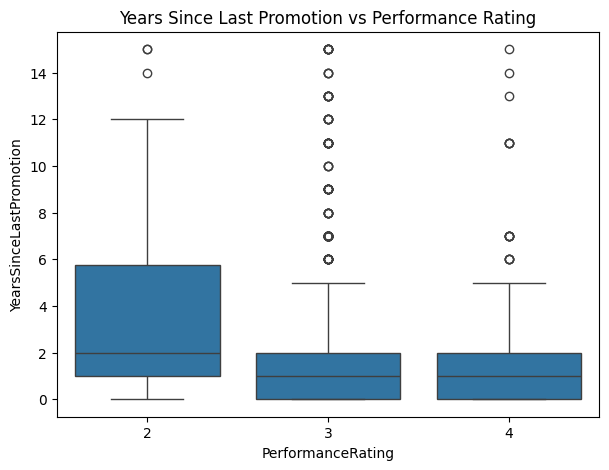

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='YearsSinceLastPromotion', data=df)
plt.title("Years Since Last Promotion vs Performance Rating")
plt.show()


---
## 11. Department vs Performance (Count Distribution)
__Insight:__

Some departments have higher concentration of low performers, indicating leadership or workload issues.

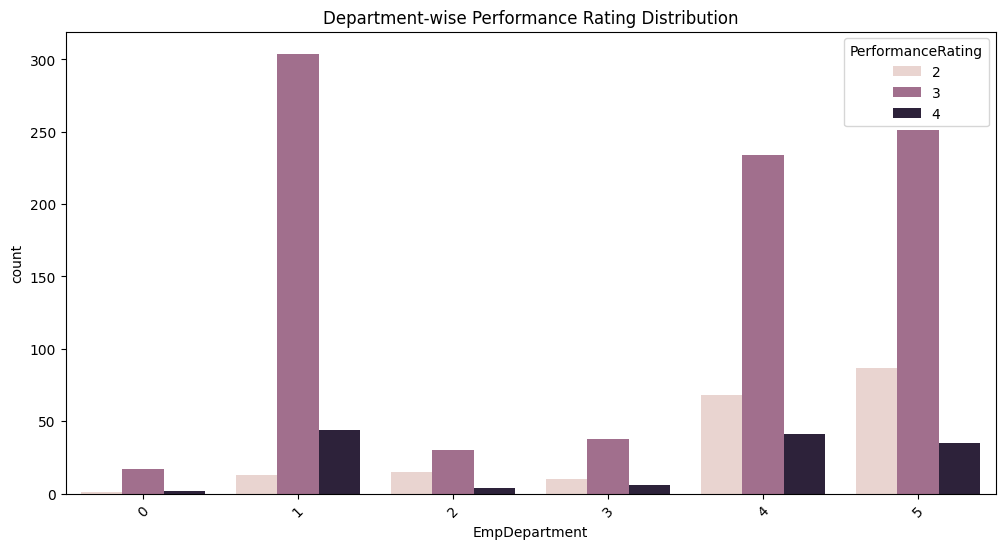

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='EmpDepartment',
    hue='PerformanceRating',
    data=df
)
plt.title("Department-wise Performance Rating Distribution")
plt.xticks(rotation=45)
plt.show()


---
## 12. Overtime Impact on Performance
__Insight:__

Excessive overtime does not guarantee higher performance and may reduce efficiency.

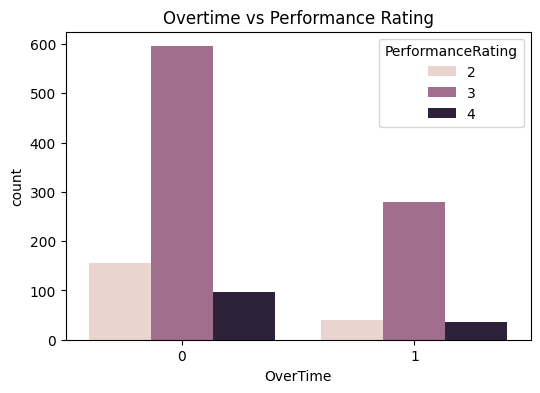

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='PerformanceRating', data=df)
plt.title("Overtime vs Performance Rating")
plt.show()


---
## 13. Job Role vs Performance (Heatmap)
__Insight:__

Certain job roles show performance clustering, useful for role-specific interventions.

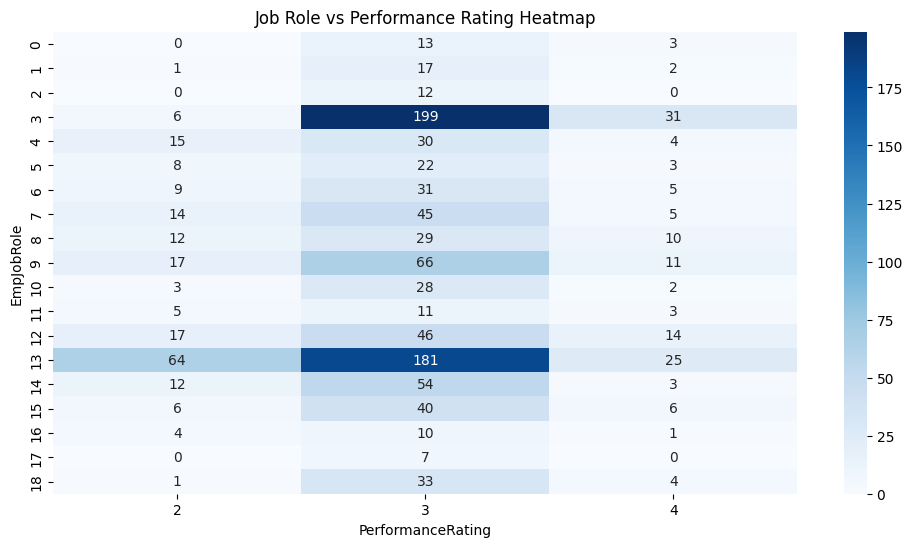

In [ ]:
job_perf = pd.crosstab(df['EmpJobRole'], df['PerformanceRating'])

plt.figure(figsize=(12,6))
sns.heatmap(job_perf, cmap='Blues', annot=True, fmt='d')
plt.title("Job Role vs Performance Rating Heatmap")
plt.show()


---
## 14. Experience vs Performance Trend
__Insight:__

Performance improves with experience up to a point, then plateaus, highlighting the need for upskilling.

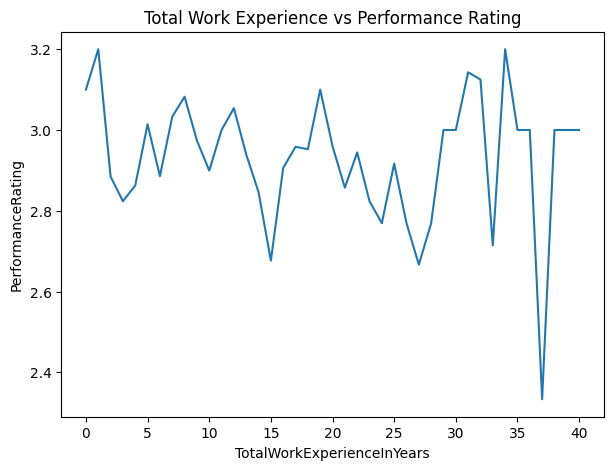

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(
    x='TotalWorkExperienceInYears',
    y='PerformanceRating',
    data=df,
    ci=None
)
plt.title("Total Work Experience vs Performance Rating")
plt.show()


---
## 15. Age vs Performance
__Insight:__
**bold text**
Age alone does not significantly determine performance—engagement and growth matter more.

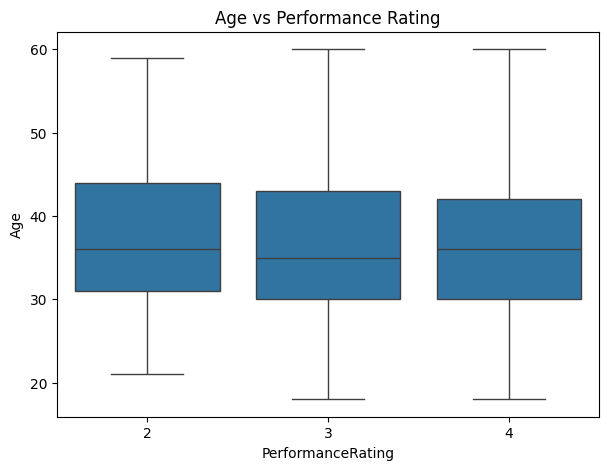

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='PerformanceRating', y='Age', data=df)
plt.title("Age vs Performance Rating")
plt.show()
